In [1]:
!if [ $(pip list | grep "seaborn" | awk '{ print $2 }' | awk 'NR < 2') != 0.13.1 ]; then pip install seaborn==0.13.1; fi
!if [ $(pip list | grep "matplotlib" | awk '{ print $2 }' | awk 'NR < 2') != 3.8.2 ]; then pip install matplotlib==3.8.2; fi


In [2]:
import pandas as pd
import pandas.core.frame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools.kyoulee_tools import *

In [3]:
df = pd.read_csv("./data/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
show_unique(df)

🚀 unique values
Pregnancies [17] : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]
Glucose [136] : [0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]
BloodPressure [47] : [0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122]
SkinThickness [51] : [0, 7, 8, 

In [6]:
data_check_object(df)
data_check_null(df)

🚀 '' Check
OK
🚀 NULL Check
OK


0

## 정보에 대한 값을 좀더 자세히 볼수 있다

1 2 3 4 분으이 수도 보이기 때문에 좀더 데이터를 분석할때 유용하다

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
feature_colums = df.columns[:-1].to_list()
feature_colums

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 확인하기

In [9]:
cols = feature_colums[1:]

df[cols]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [10]:
df_null = df[cols].replace(0, np.nan)
data_check_null(df_null)
df_null = df_null.isnull()

🚀 NULL Check
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Total : 652


In [11]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

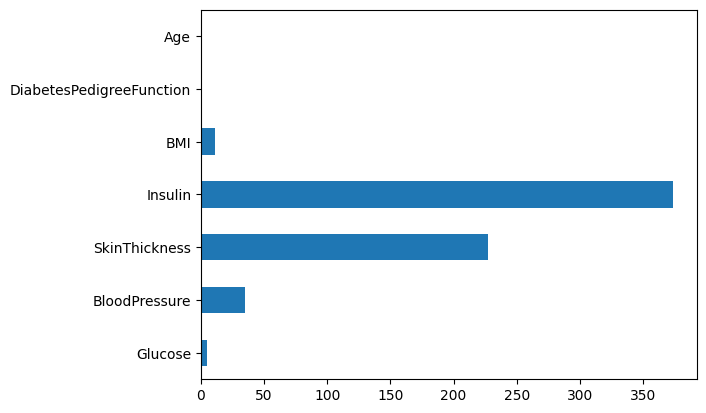

In [12]:
df_null.sum().plot.barh()

<Axes: >

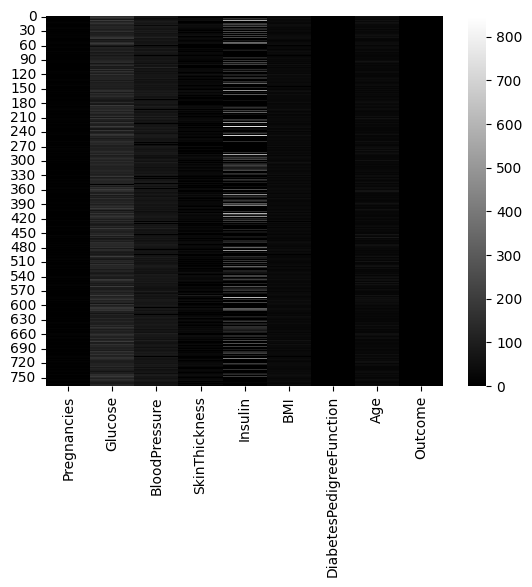

In [13]:
sns.heatmap(df, cmap="gray")


## 정답값


In [14]:
df["Outcome"].value_counts()
df["Outcome"].value_counts(normalize=1)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [15]:
df.groupby(["Pregnancies"])["Outcome"].mean()
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])


,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


## 데이터 변형 

In [16]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


## plt 잘다루기

```plot```
에서 추가로 ```.bar```을 입력하면 바형식으로 바뀐다 

<Axes: >

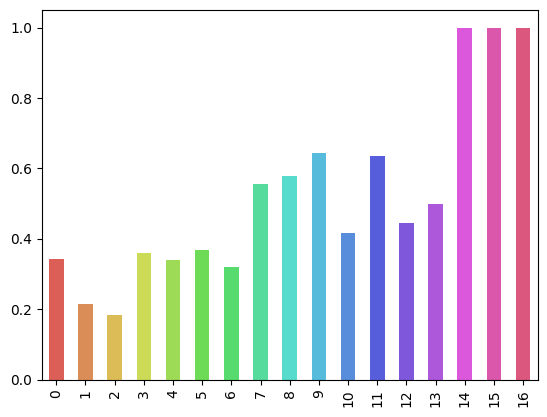

In [17]:
colors = sns.color_palette('hls', df_po["Pregnancies"].count())
df_po["mean"].plot.bar(color=colors)

## countplot

<Axes: xlabel='Outcome', ylabel='count'>

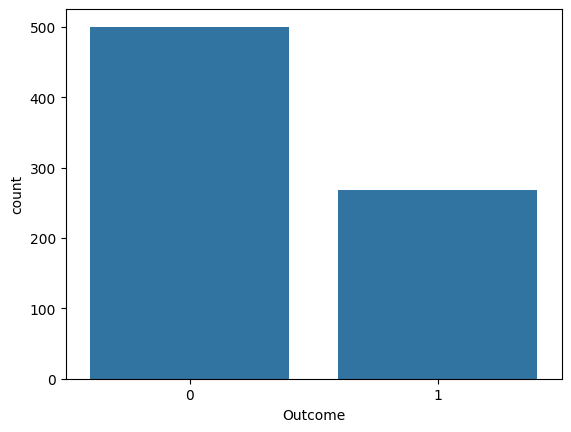

In [18]:
sns.countplot(data=df, x="Outcome")

### 임신 횟수에 따른 당뇨병 발병 빈도수를 비교합니다.

워낫 인코딩? 이라고 하는 값을 범주화 하여 나눌수 있다


<Axes: xlabel='Pregnancies', ylabel='count'>

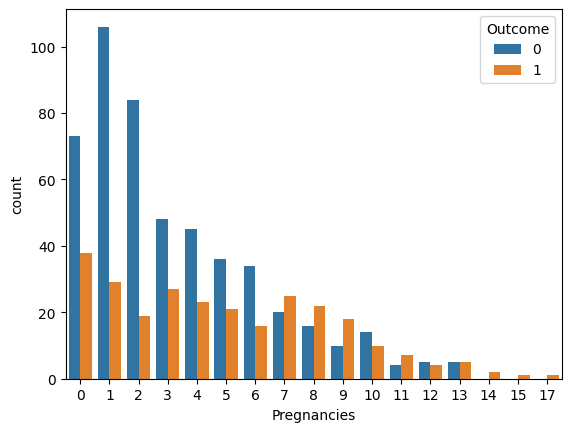

In [19]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [20]:
df["Pregnancies_high"]= df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


barplot

<Axes: xlabel='Outcome', ylabel='BMI'>

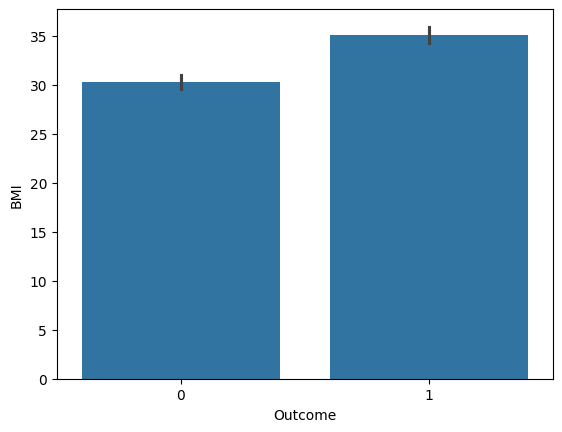

In [21]:
sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

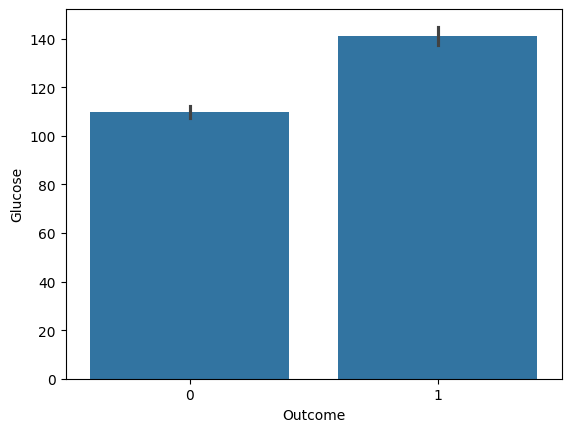

In [22]:
sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

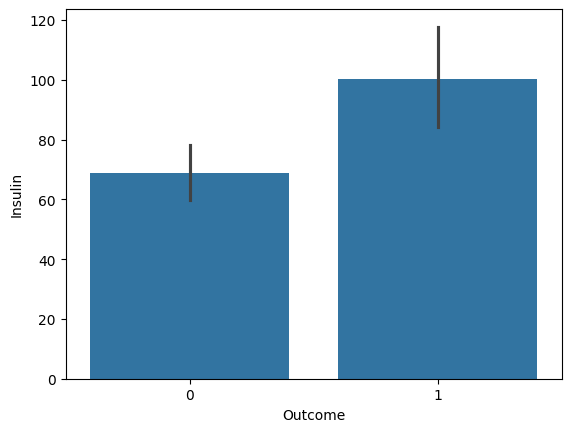

In [23]:
sns.barplot(data=df, x="Outcome", y="Insulin")

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

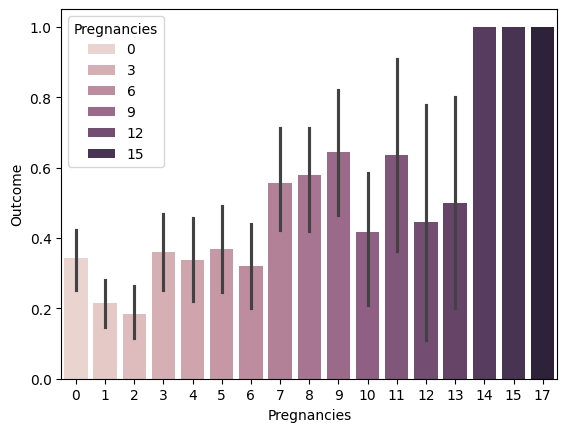

In [24]:
sns.barplot(data=df, x="Pregnancies", y="Outcome", hue="Pregnancies")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

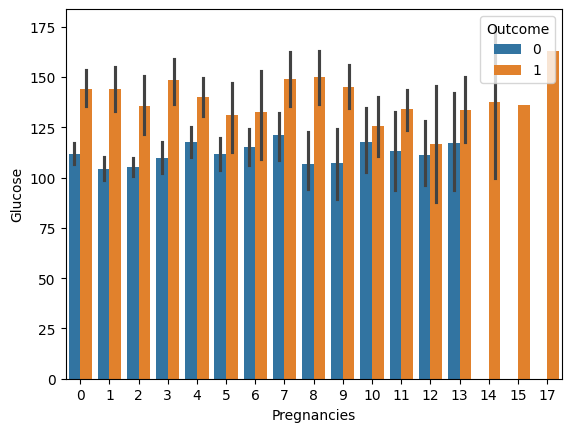

In [25]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

### BMI 지수와 상관관계

별로 관여가 없어보인다

<Axes: xlabel='Pregnancies', ylabel='BMI'>

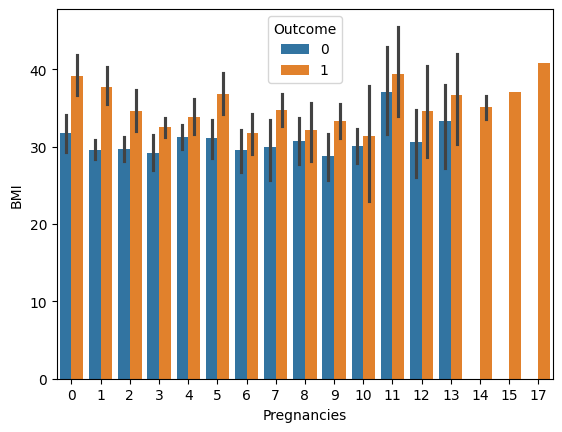

In [26]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

df_po["mean"].plot.bar

### Insulin
인슐린 수치가 높을 수록 발병 확율이 높다

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

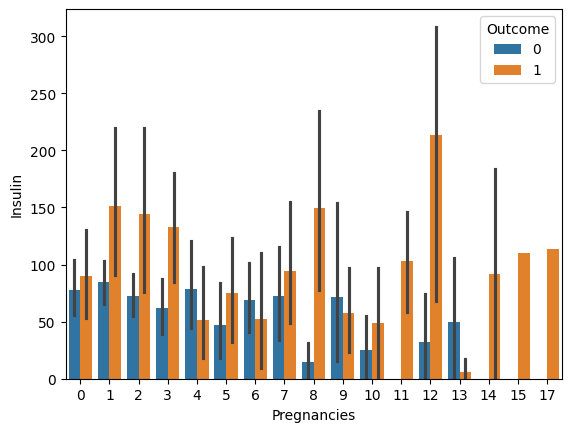

In [27]:
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

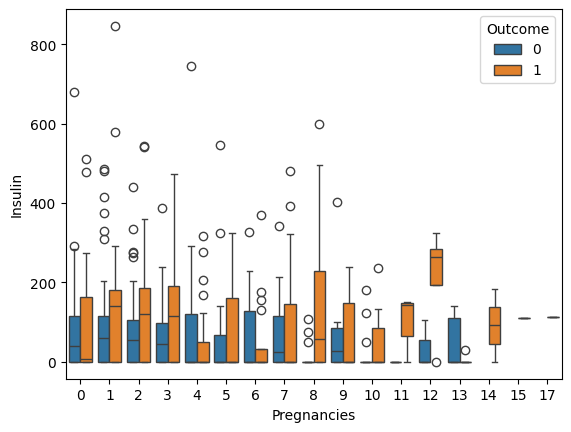

In [61]:
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

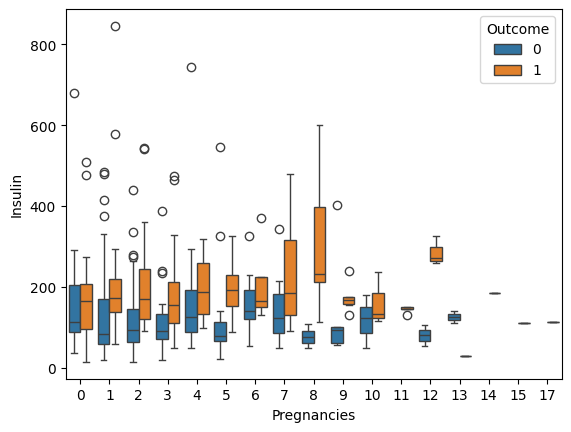

In [28]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

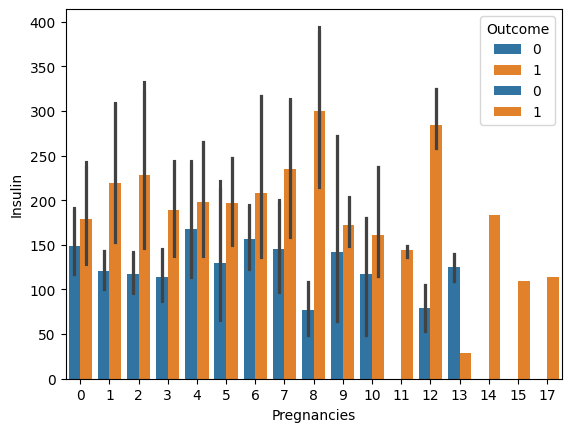

In [29]:

sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

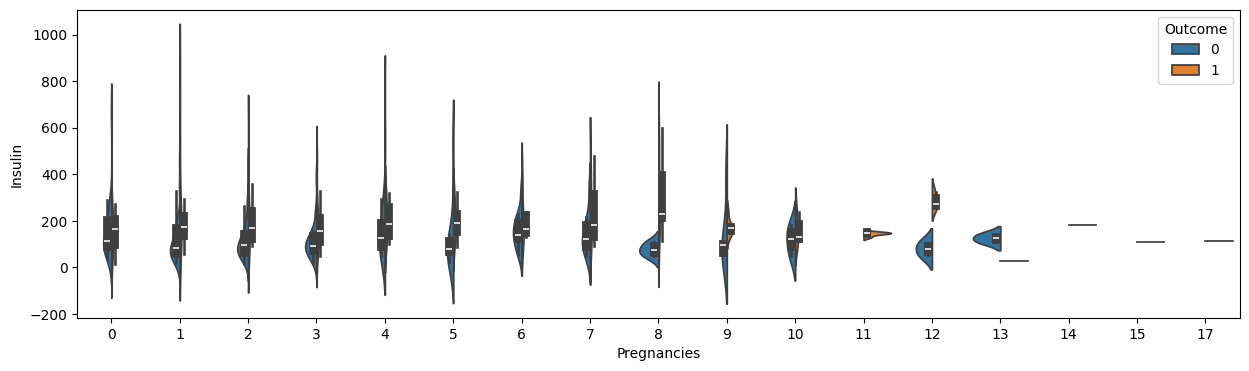

In [30]:
plt.figure(figsize=(15,  4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=1)

### swarmplot

/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/Users/kyoulee/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


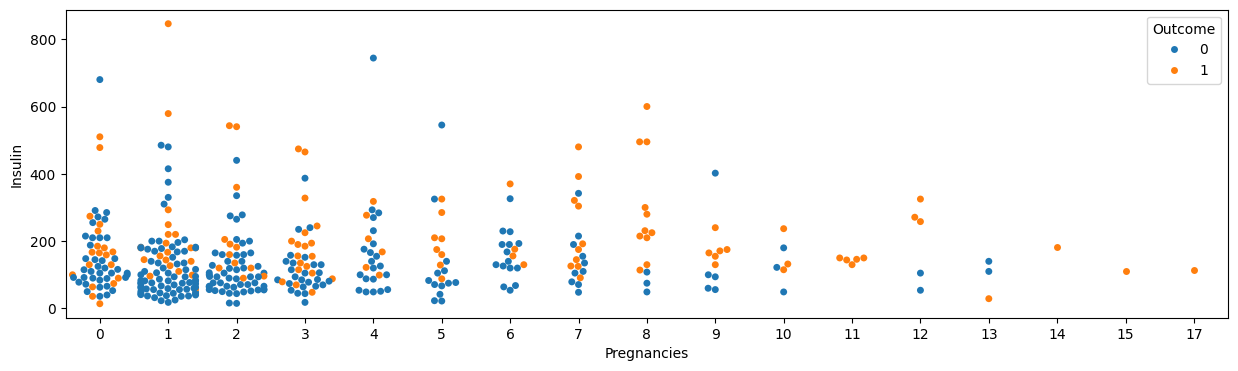

In [31]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

In [32]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/2685521112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/2685521112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

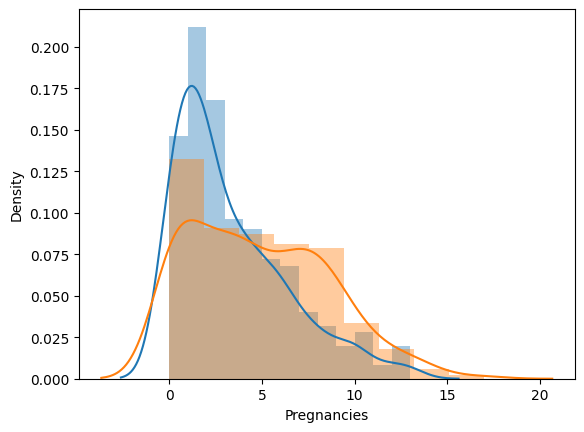

In [33]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/1300450138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/1300450138.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<Axes: xlabel='Age', ylabel='Density'>

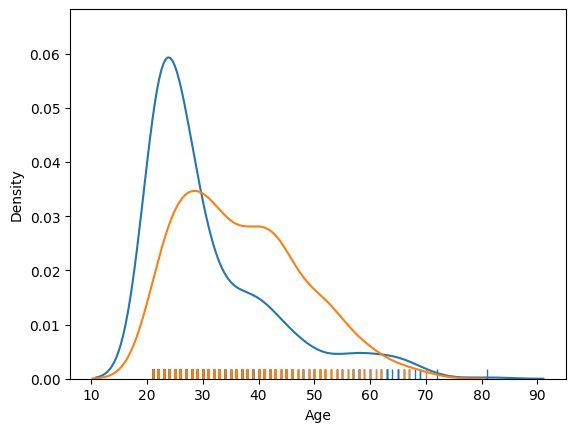

In [34]:
sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")

# sns.kdeplot(df_0["Age"], label="0")
# sns.kdeplot(df_1["Age"], label="1")

### subplots

In [35]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


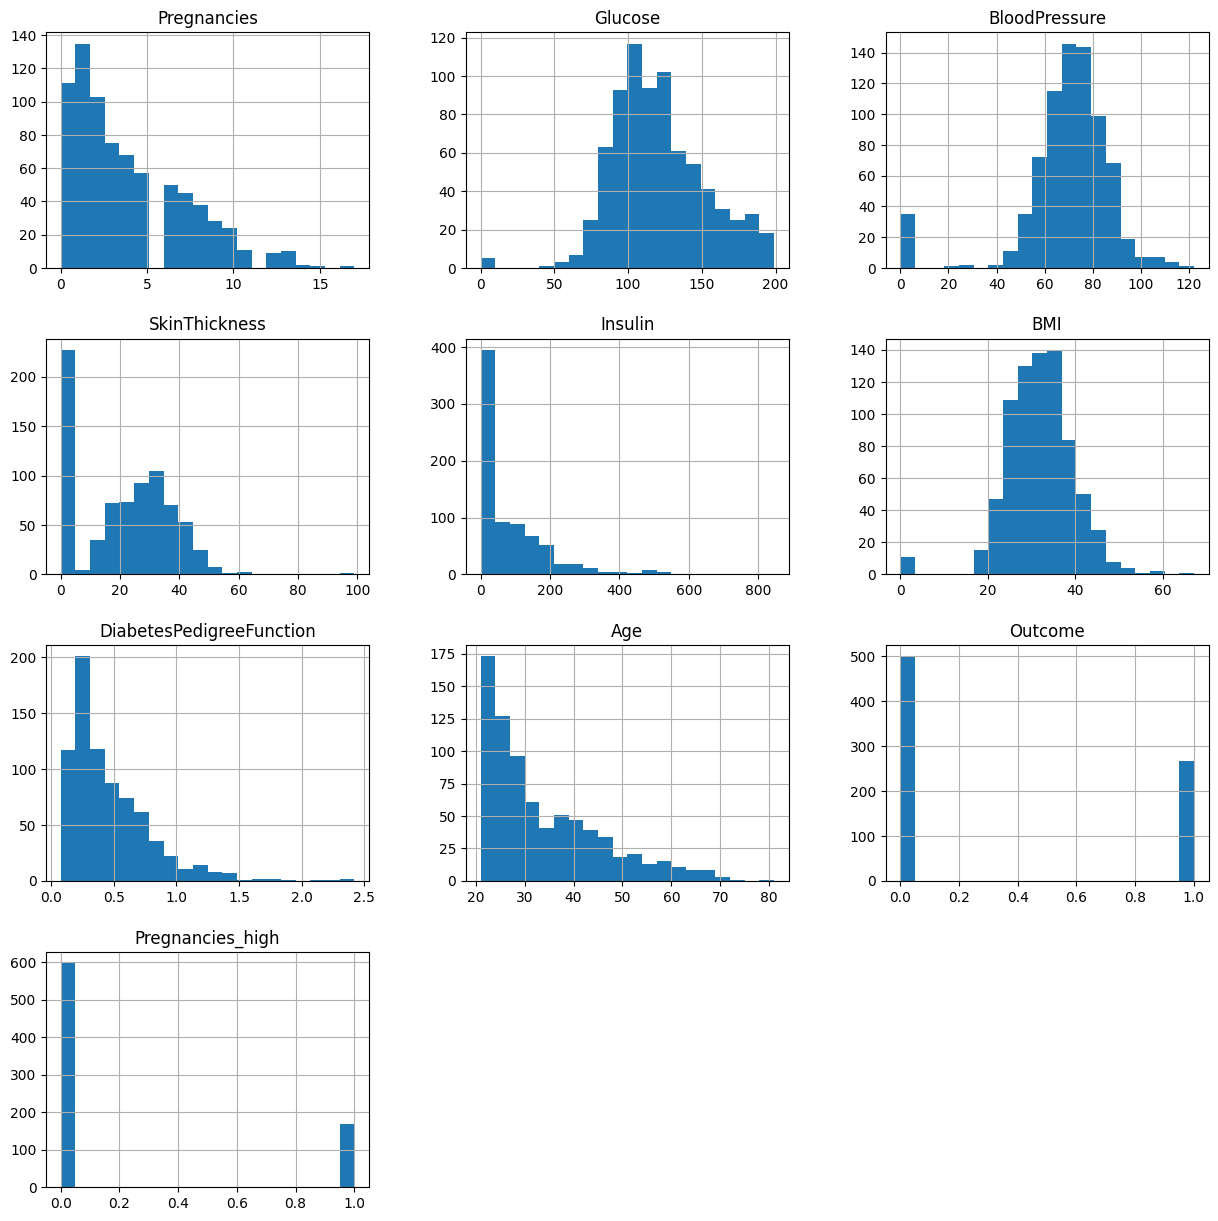

In [36]:
result = df.hist(figsize=(15,15), bins=20)

In [37]:
col_num = df.columns.shape
col_num

(10,)

In [38]:
cols = df.columns[:-2].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [39]:
for i, column in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, column, row, col)

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1


/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/345896405.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[column], ax=axes[row][col])
/var/folders/3f/8jcmrpcj3xd0d81n12nnlcp00000gp/T/ipykernel_5842/345896405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[column

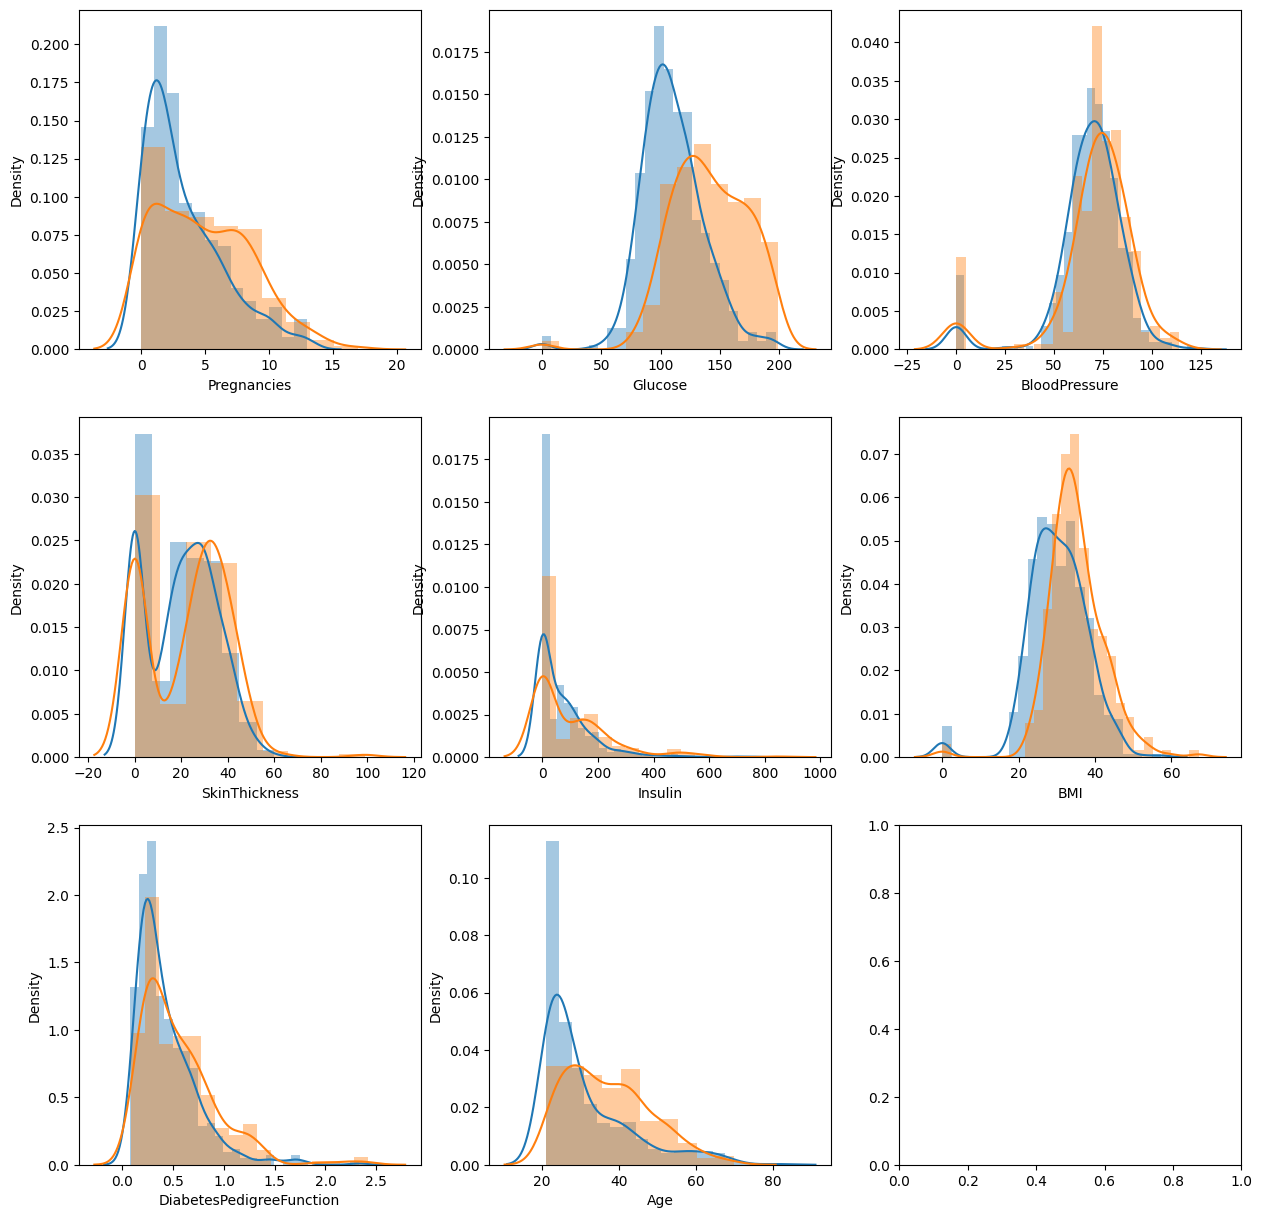

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, column in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df_0[column], ax=axes[row][col])
    sns.distplot(df_1[column], ax=axes[row][col])

### vionlinplot
장점 :

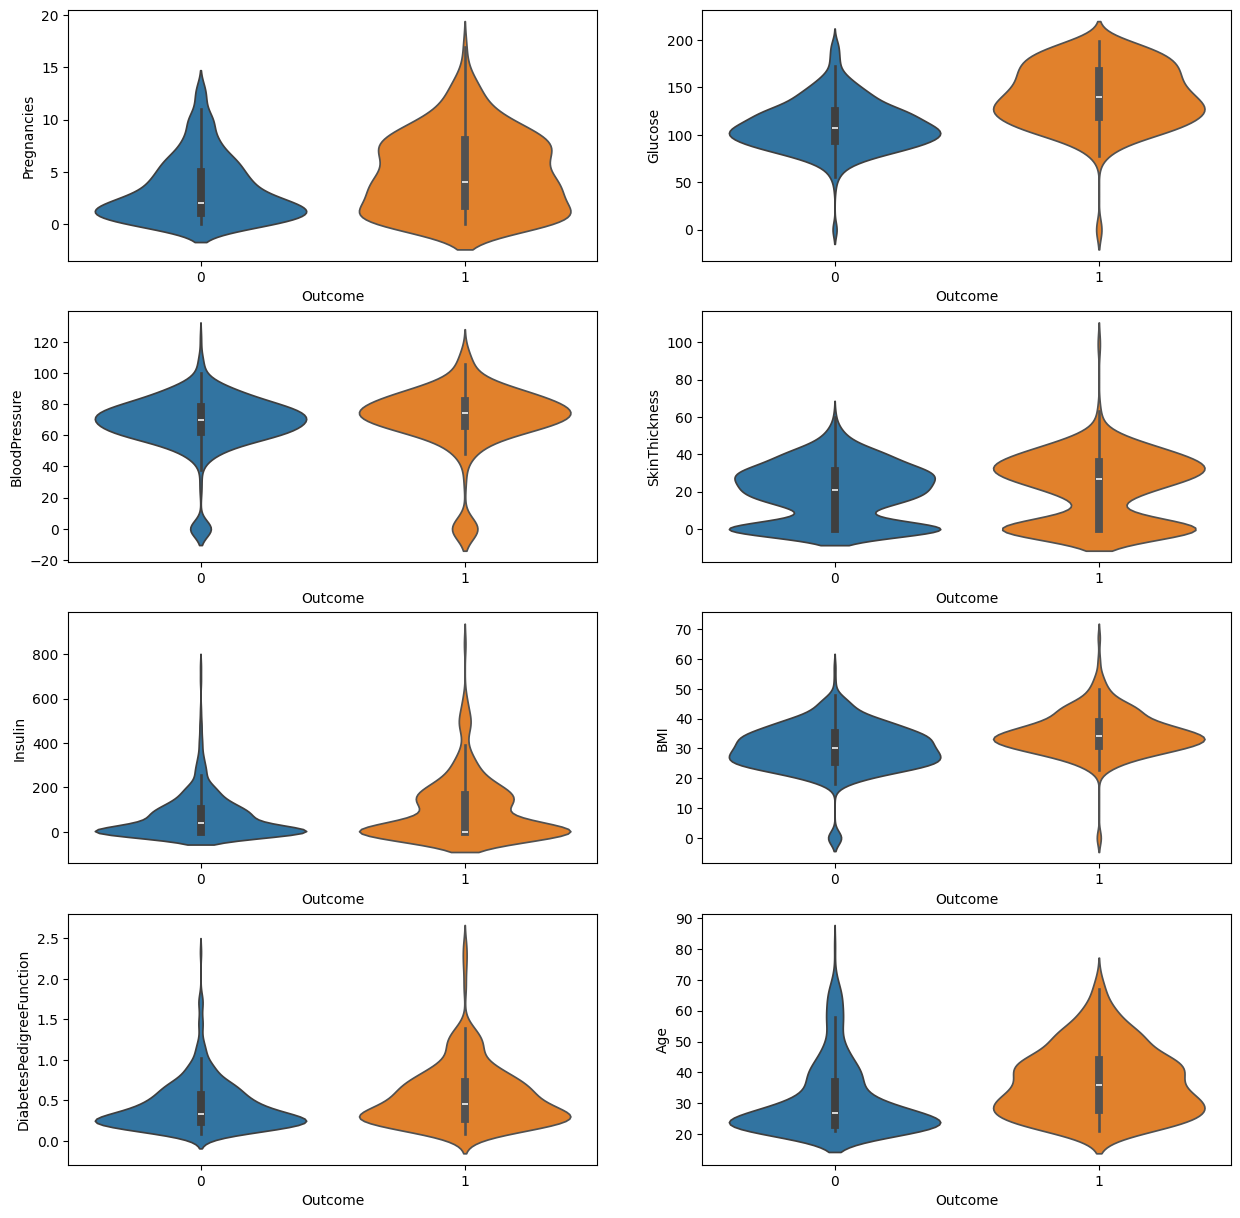

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, column in enumerate(cols):
    row = i // 2
    col = i % 2
    sns.violinplot(data = df_0, x="Outcome", y=column, ax=axes[row][col])
    sns.violinplot(data = df_1, x="Outcome", y=column, ax=axes[row][col])

### lmplot
장점 : 뭔가 선형과 데이터의 위치를 볼 수 있다


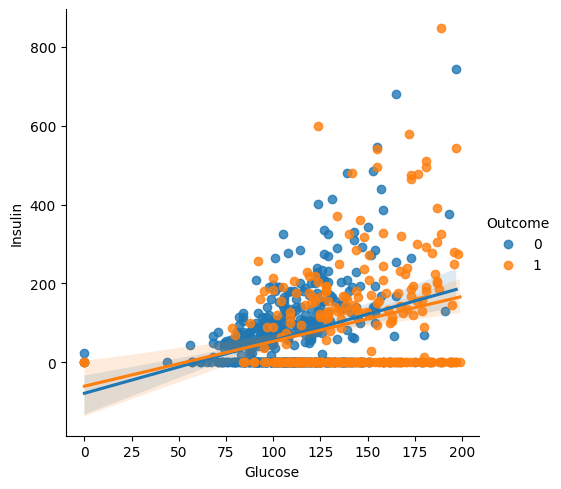

In [42]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

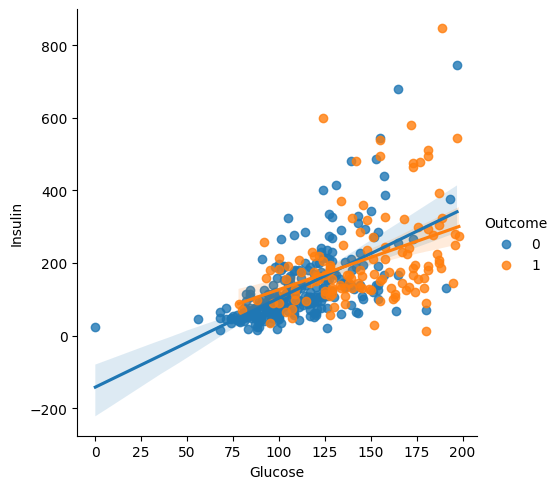

In [43]:
sns.lmplot(data=df[df["Insulin"]> 0], x="Glucose", y="Insulin", hue="Outcome")

### pairplot
장점 : 모든 값에대하여 그리게 된다?
    다른 그림도 가능하다

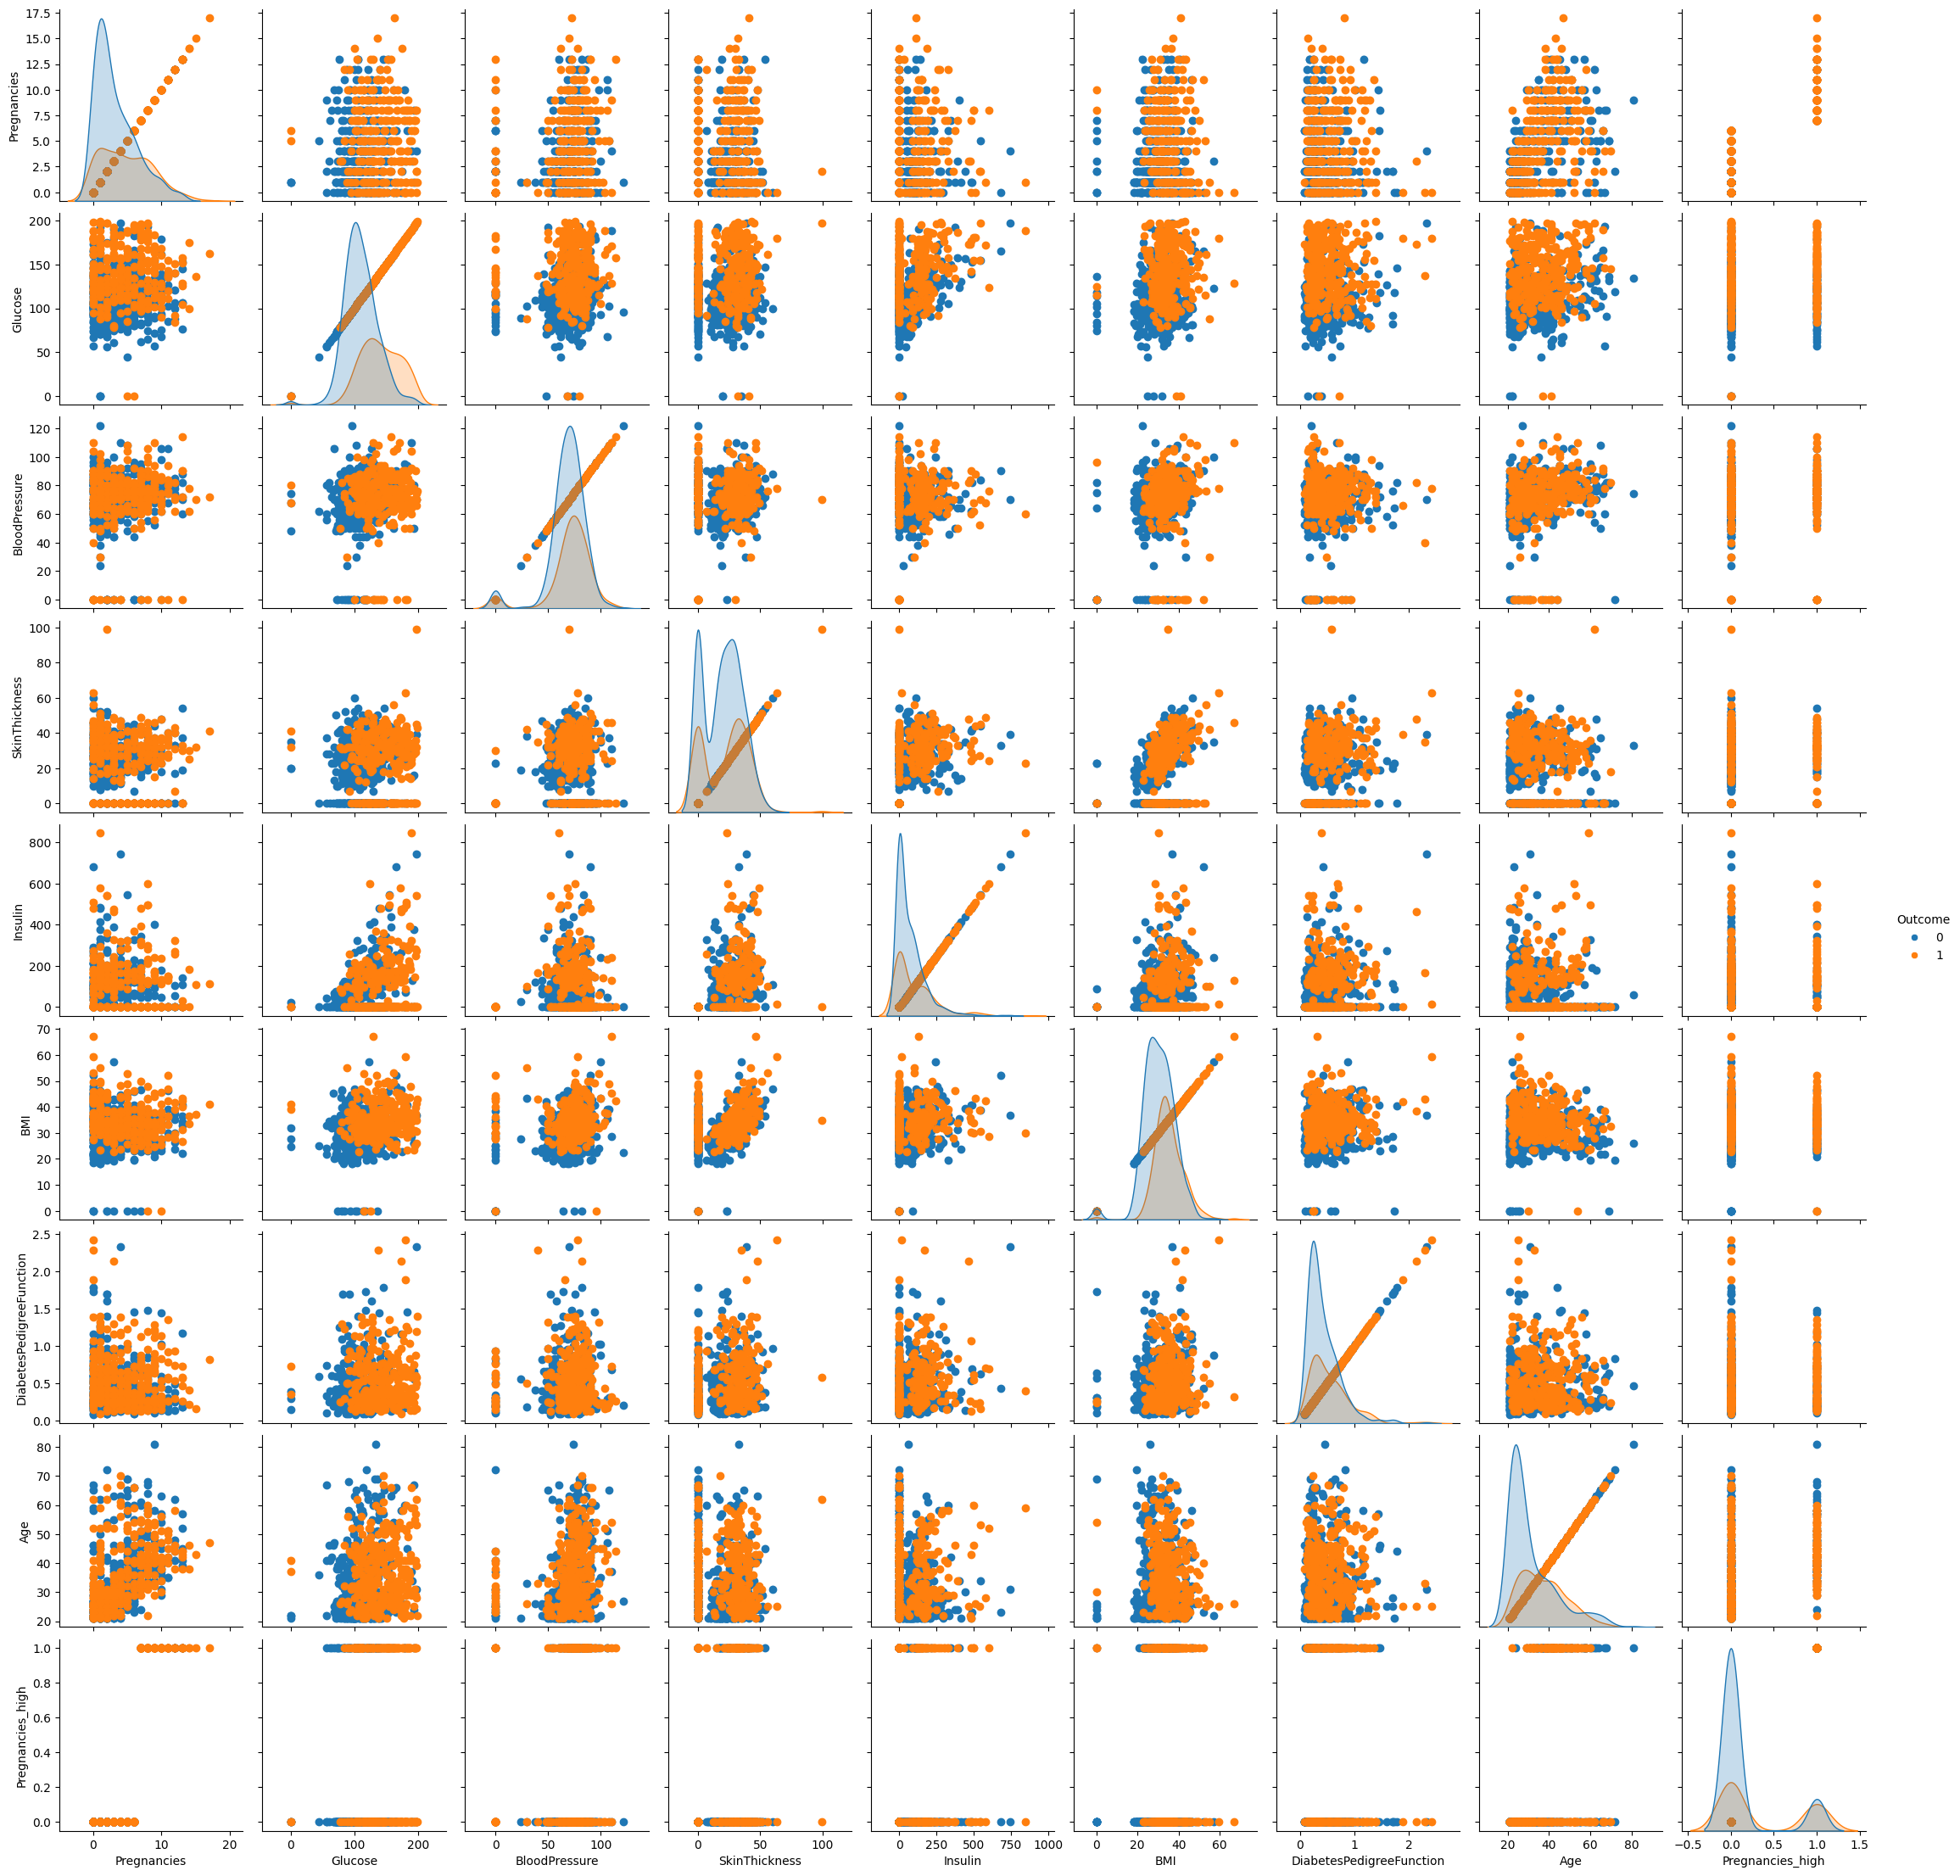

In [44]:
g = sns.pairplot(df, hue="Outcome")
g.map(plt.scatter)
# sns.pairplot(df, kind="reg")

## 상관 분석

corraytion?? 상관분석

In [45]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<Axes: >

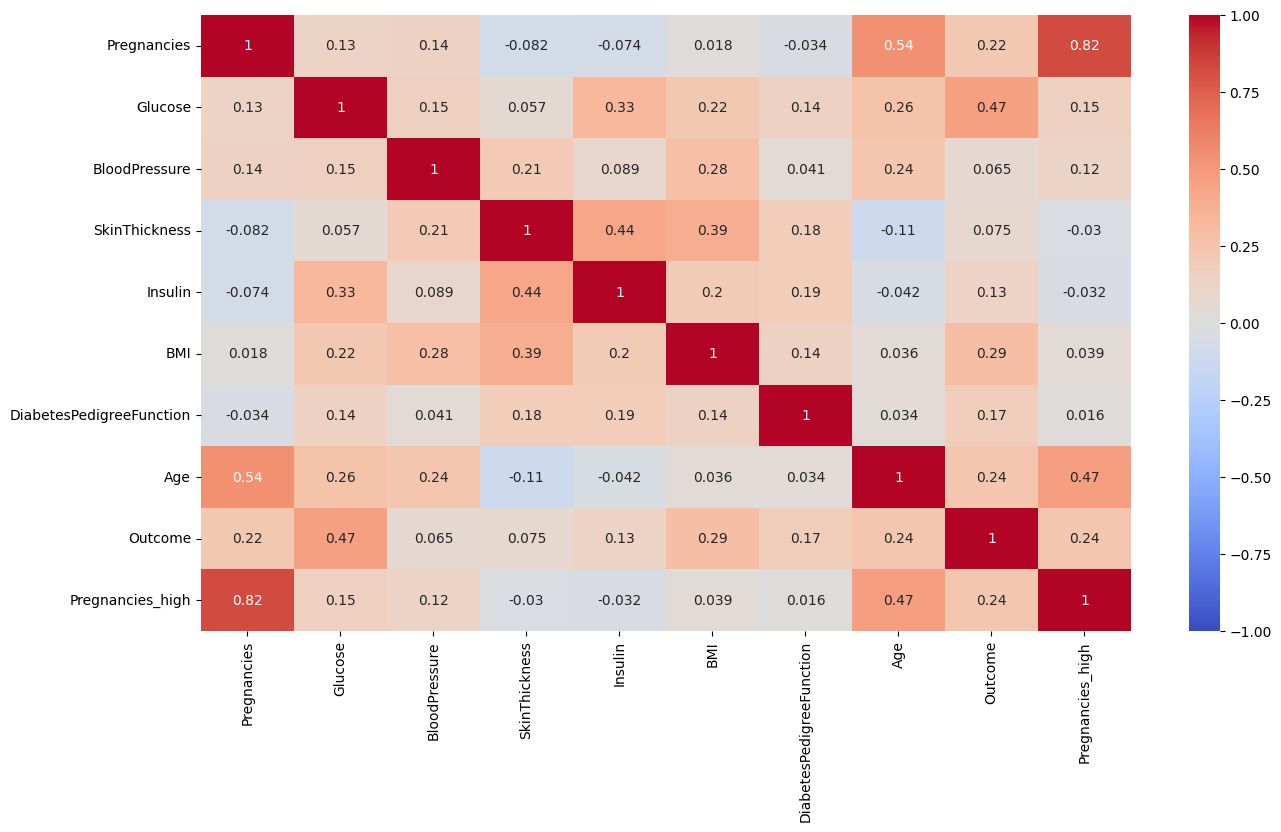

In [46]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [47]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


<Axes: >

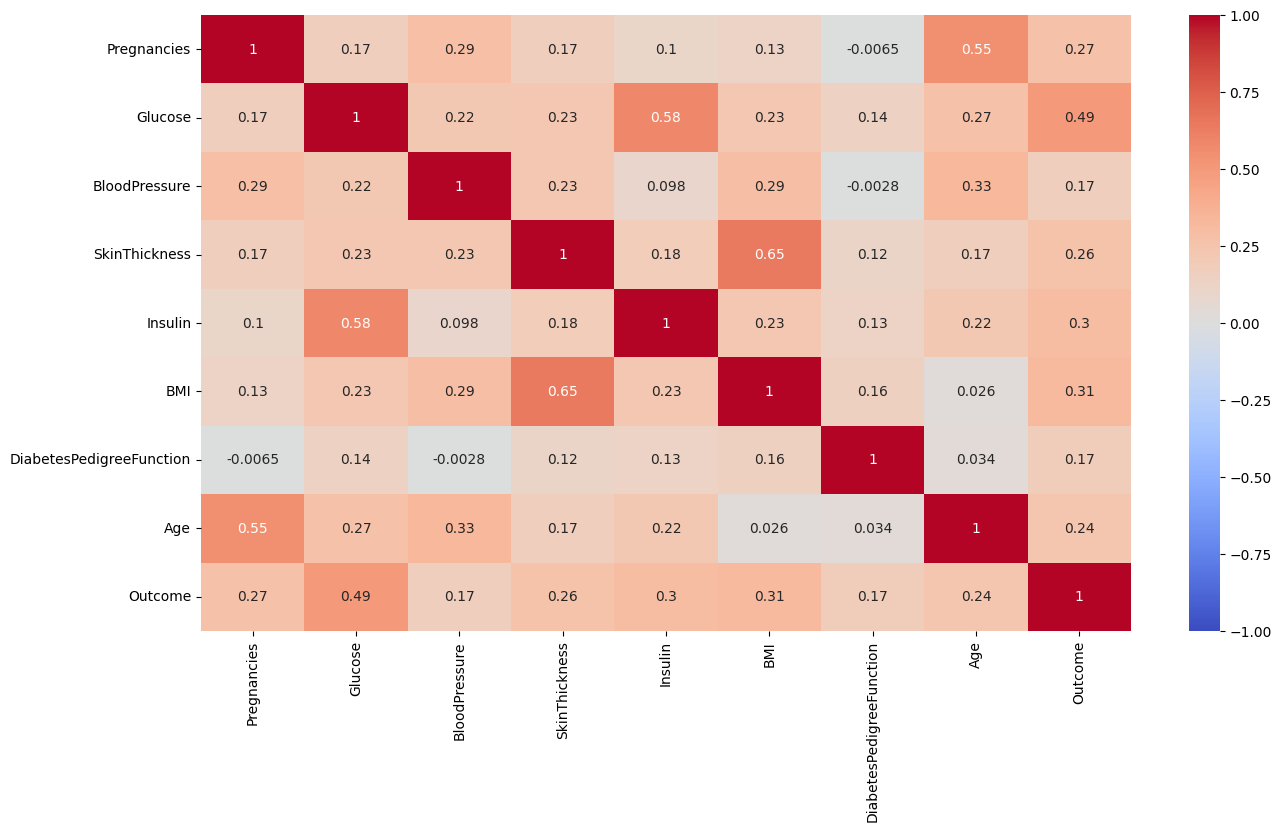

In [50]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [51]:
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: xlabel='Insulin', ylabel='Glucose'>

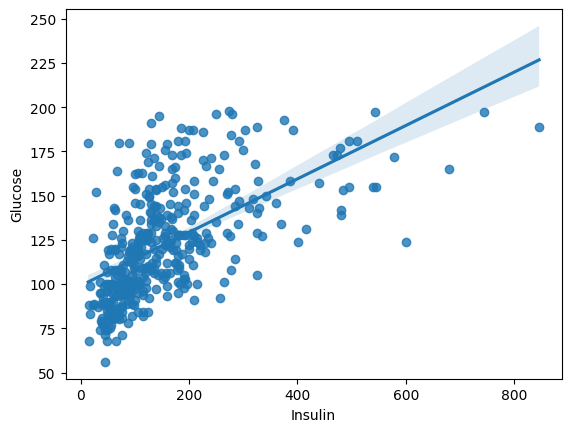

In [54]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

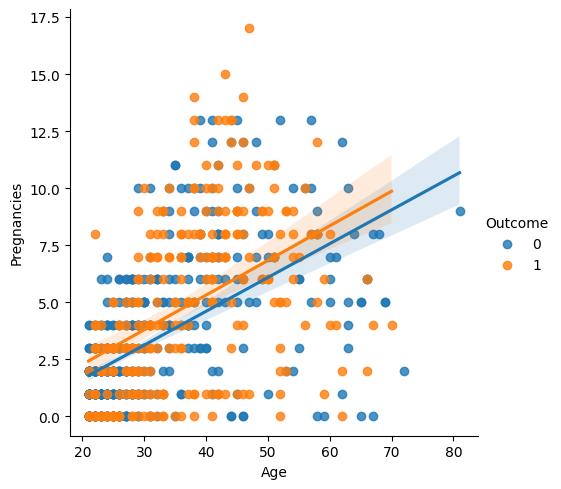

In [59]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

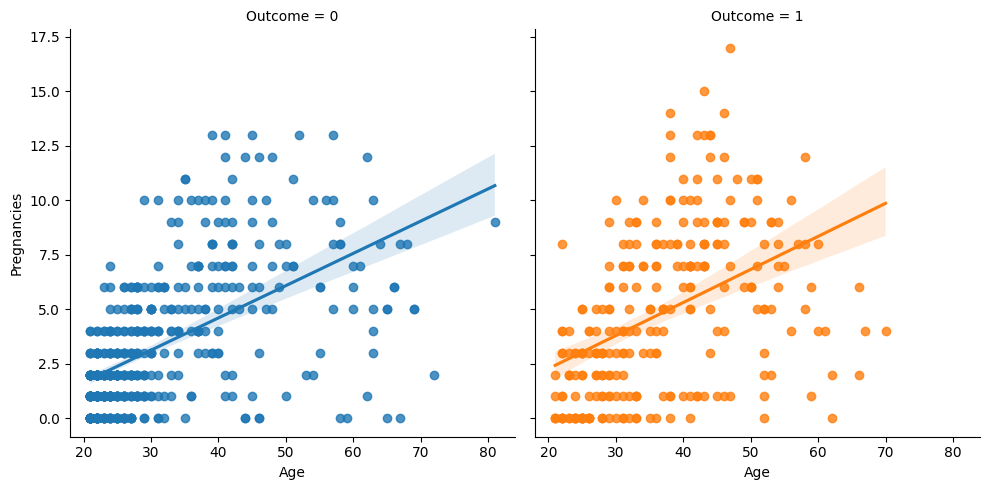

In [60]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")